## 목표 : 성분에 따른 칼로리 예측
- 데이터 : Hamberger.csv
- 피 쳐 : sodium, sugar, total_fat, protein
- 타 겟 : calories
- 학습 방법 : 지도학습 + 예측 => KNN 기반 회귀
- 학습/테스트 데이터 => 85% : 15%

(1) 모듈 로딩 및 데이터 준비 <hr>

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [495]:
# 데이터 파일
data_file = './Hamburger.csv'

In [496]:
# 데이터 준비
bergerDF =pd.read_csv(data_file)

In [497]:
bergerDF

,restaurant,item,calories,sodium,sugar,total_fat,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380.00,1110.00,11.00,7.00,37.00
1,Mcdonalds,Single Bacon Smokehouse Burger,840.00,1580.00,18.00,45.00,46.00
2,Mcdonalds,Double Bacon Smokehouse Burger,1130.00,1920.00,18.00,67.00,70.00
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750.00,1940.00,18.00,31.00,55.00
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920.00,1980.00,18.00,45.00,46.00
...,...,...,...,...,...,...,...
1063,prank_burger,더블치즈버거(L),687.04,4.55,33.45,19.51,1149.60
1064,prank_burger,머쉬룸버거(L),665.30,13.58,26.75,18.10,1203.43
1065,prank_burger,JG버거(L),828.28,6.42,48.23,22.28,1574.77
1066,prank_burger,SG불고기버거(L),491.06,13.84,17.24,10.60,606.15


In [498]:
bergerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   restaurant  1068 non-null   object 
 1   item        1068 non-null   object 
 2   calories    1068 non-null   float64
 3   sodium      1068 non-null   float64
 4   sugar       1068 non-null   float64
 5   total_fat   1068 non-null   float64
 6   protein     1068 non-null   float64
dtypes: float64(5), object(2)
memory usage: 58.5+ KB


(2) 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값, 고유값

In [499]:
featureDF = bergerDF.iloc[:,3:]
targetSR = bergerDF.iloc[:,2:3]

In [500]:
featureDF

,sodium,sugar,total_fat,protein
0,1110.00,11.00,7.00,37.00
1,1580.00,18.00,45.00,46.00
2,1920.00,18.00,67.00,70.00
3,1940.00,18.00,31.00,55.00
4,1980.00,18.00,45.00,46.00
...,...,...,...,...
1063,4.55,33.45,19.51,1149.60
1064,13.58,26.75,18.10,1203.43
1065,6.42,48.23,22.28,1574.77
1066,13.84,17.24,10.60,606.15


In [501]:
targetSR

,calories
0,380.00
1,840.00
2,1130.00
3,750.00
4,920.00
...,...
1063,687.04
1064,665.30
1065,828.28
1066,491.06


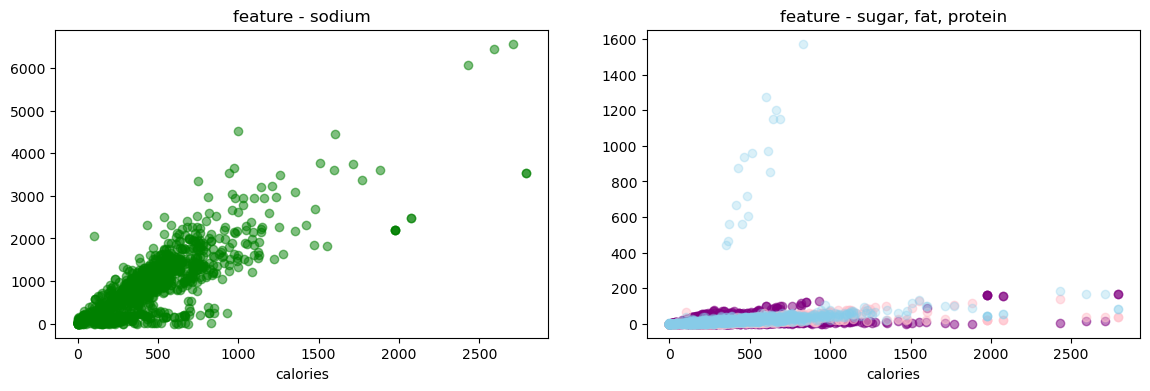

In [502]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
plt.scatter(targetSR, featureDF['sodium'], alpha=0.5, color='green')
plt.xlabel('calories')
plt.title('feature - sodium')

plt.subplot(1,2,2)
plt.scatter(targetSR,featureDF['sugar'], alpha=0.5, color='purple')
plt.scatter(targetSR,featureDF['total_fat'], alpha=0.5, color='pink')
plt.scatter(targetSR,featureDF['protein'], alpha=0.3, color='skyblue')
plt.xlabel('calories')
plt.title('feature - sugar, fat, protein')
plt.show()

In [503]:
targetSR

,calories
0,380.00
1,840.00
2,1130.00
3,750.00
4,920.00
...,...
1063,687.04
1064,665.30
1065,828.28
1066,491.06


In [504]:
from sklearn.model_selection import train_test_split

In [530]:
# 모델 인스턴스 생성 후 학습
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=10,
                                                    test_size=0.15)
KNRmodel=KNeighborsRegressor()
# 모델 학습
KNRmodel.fit(X_train, y_train)

train_score = KNRmodel.score(X_train, y_train)
test_score = KNRmodel.score(X_test, y_test)
print(f'[TRAIN_SCORE] : {train_score}\n[TEST SCORE] : {test_score}')

[TRAIN_SCORE] : 0.8762657407199128
[TEST SCORE] : 0.7107895473125767


In [531]:
top_train_score = 0
top_test_score = 0
top_random_state = 0
for num in range(1,1001):
    X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                        targetSR,
                                                        random_state=num,
                                                        test_size=0.15)
    # 모델 인스턴스 생성
    KNRmodel=KNeighborsRegressor(n_neighbors=5)
    # 튜닝 -> 파라미터 값 조절
    # 모델 학습
    KNRmodel.fit(X_train, y_train)
    
    train_score = KNRmodel.score(X_train, y_train)
    test_score = KNRmodel.score(X_test, y_test)
    if (test_score >= top_test_score):# and (train_score >= top_train_score):
        top_train_score = train_score
        top_test_score = test_score
        top_random_state = num
        
print(f'[TOP_RANDOM_STATE_NUM] : {top_random_state} \n[TOP_TRAIN_SCORE] : {top_train_score} \n[TOP_TEST_SCORE] : {top_test_score}')

[TOP_RANDOM_STATE_NUM] : 308 
[TOP_TRAIN_SCORE] : 0.8593757791815952 
[TOP_TEST_SCORE] : 0.8927067712942001


In [507]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                        targetSR,
                                                        random_state=308,
                                                        test_size=0.15)
# 모델 인스턴스 생성
KNRmodel=KNeighborsRegressor(n_neighbors=5)
# 튜닝 -> 파라미터 값 조절
# 모델 학습
KNRmodel.fit(X_train, y_train)

train_score = KNRmodel.score(X_train, y_train)
test_score = KNRmodel.score(X_test, y_test)
print(f'[TRAIN_SCORE] : {train_score} \n[TEST_SCORE] : {test_score}')

[TRAIN_SCORE] : 0.8593757791815952 
[TEST_SCORE] : 0.8927067712942001


In [508]:
from sklearn.model_selection import GridSearchCV

In [509]:
# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1,101)}  # 이웃 수 후보 목록

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(KNRmodel, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 101)},
             scoring='neg_mean_squared_error')

In [510]:
# 최적의 이웃 수 출력
print("Best neighbors:", grid_search.best_params_['n_neighbors'])

Best neighbors: 2


In [511]:
# 다시 모델 인스턴스 생성 후 학습
KNRmodel=KNeighborsRegressor(n_neighbors=2)
# 모델 학습
KNRmodel.fit(X_train, y_train)

train_score = KNRmodel.score(X_train, y_train)
test_score = KNRmodel.score(X_test, y_test)
print(f'[TRAIN_SCORE] : {train_score}\n[TEST SCORE] : {test_score}')

[TRAIN_SCORE] : 0.9459763920967256
[TEST SCORE] : 0.9018557049441666


In [512]:
# 튜닝(2)
# KNR의 파라미터 중 p 조정 => 부동소수점
top_train_score = 0
top_test_score = 0
top_p = 0
for num in range(1,101):
    KNRmodel=KNeighborsRegressor(n_neighbors=2, p=num)
    # 모델 학습
    KNRmodel.fit(X_train, y_train)
    
    train_score = KNRmodel.score(X_train, y_train)
    test_score = KNRmodel.score(X_test, y_test)
    if (test_score >= top_test_score):# and (train_score >= top_train_score):
        top_train_score = train_score
        top_test_score = test_score
        top_p = num
        
print(f'[TRAIN_SCORE] : {top_train_score}\n[TEST SCORE] : {top_test_score}\n[TOP_P] : {top_p}')

[TRAIN_SCORE] : 0.9514125551044949
[TEST SCORE] : 0.9079734985082756
[TOP_P] : 1


In [513]:
# 다시 모델 인스턴스 생성 후 학습
KNRmodel=KNeighborsRegressor(n_neighbors=2, p=1)
# 모델 학습
KNRmodel.fit(X_train, y_train)

train_score = KNRmodel.score(X_train, y_train)
test_score = KNRmodel.score(X_test, y_test)
print(f'[TRAIN_SCORE] : {train_score}\n[TEST SCORE] : {test_score}')

[TRAIN_SCORE] : 0.9514125551044949
[TEST SCORE] : 0.9079734985082756


In [514]:
# 튜닝(3) 가중치 default='uniform'에서 'distance로 변경
KNRmodel=KNeighborsRegressor(n_neighbors=2, weights='distance', p=1)
# 모델 학습
KNRmodel.fit(X_train, y_train)

train_score = KNRmodel.score(X_train, y_train)
test_score = KNRmodel.score(X_test, y_test)
print(f'[TRAIN_SCORE] : {train_score}\n[TEST SCORE] : {test_score}')

[TRAIN_SCORE] : 0.9999973480798672
[TEST SCORE] : 0.9158641614791405


In [515]:
# 예측

In [516]:
y_pre = KNRmodel.predict(X_test)

In [517]:
y_pre

array([[2.01409639e+02],
       [2.86551724e+02],
       [4.52564103e+02],
       [6.20076142e+02],
       [4.26521739e+02],
       [1.41802920e+03],
       [6.78666667e+02],
       [1.61176471e+02],
       [2.46923077e+02],
       [3.89655172e+02],
       [1.02215865e+03],
       [1.64615385e+02],
       [6.18536585e+02],
       [5.38000000e+02],
       [3.40000000e+02],
       [4.02631579e+02],
       [2.13176471e+02],
       [7.52424242e+02],
       [1.00000000e+00],
       [5.98309859e+02],
       [3.30000000e+02],
       [1.57692308e+02],
       [3.90350877e+02],
       [2.53939394e+02],
       [6.18461538e+02],
       [3.11875000e+02],
       [6.24000000e+01],
       [4.93333333e+02],
       [5.08095238e+02],
       [1.50909091e+02],
       [5.70000000e+02],
       [0.00000000e+00],
       [3.36000000e+02],
       [4.11379310e+02],
       [7.66666667e+02],
       [4.14358974e+02],
       [4.40526316e+02],
       [6.58878661e+02],
       [5.65600000e+02],
       [6.44972973e+02],


In [518]:
# 성능 평가

In [519]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [520]:
# 성능평가 => 결정계수값(r2) -> 1에 가까울수록 좋음
r2_score(y_pre, y_test)

0.9069528194740757

In [521]:
# 평균절대오차 => 오차가 적을수록 좋음
mean_absolute_error(y_pre, y_test)

66.30999035990929

In [522]:
# 평균제곱근오차 => 오차가 적을수록 좋음
mean_squared_error(y_pre, y_test, squared=False)

99.63602618740421

In [523]:
def save_model(model,filename):
    import joblib
    import os
    model_dir='./model/'
    model_filename=model_dir+f'{filename}.pkl'
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    joblib.dump(model, model_filename)
save_model(KNRmodel,"KNR.pkl")